<a href="https://colab.research.google.com/github/bschmid36/DeepLearning_SVHN_Digit_Recognition/blob/main/CNN_Project_Learner_Notebook_SVHN_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Networks Project: Street View Housing Number Digit Recognition**

# **Marks: 30**

Welcome to the project on classification using Convolutional Neural Networks. We will continue to work with the Street View Housing Numbers (SVHN) image dataset for this project.

--------------
## **Context** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
## **Objective**
----------------

To build a CNN model that can recognize the digits in the images.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

In [ ]:
print(tf.__version__)

2.12.0


## **Loading the dataset**



In [ ]:
import h5py


h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')


X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]



h5f.close()

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**



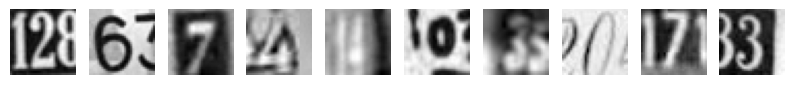

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Visualizing the first 10 images in the dataset and printing their labels

%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)
    
    plt.imshow(X_train[i], cmap = "gray") 

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**


In [ ]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshaping the dataset to be able to pass them to CNNs

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [ ]:
# Normalizing inputs 

X_train = X_train / 255.0

X_test = X_test / 255.0

In [ ]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


In [ ]:
# One-hot encoding the output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

## **Model Building**


In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
# Defining the model

def cnn_model_1():

    model = Sequential() 
    
    # Add layers

    model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1)))

    model.add(LeakyReLU(0.1))

    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

    model.add(LeakyReLU(0.1))

    model.add(MaxPool2D((2, 2), padding = 'same'))

    model.add(Flatten())

    model.add(Dense(32, activation='relu'))

    model.add(LeakyReLU(0.1))

    model.add(Dense(10, activation='softmax'))
    
    # Compile the model

    model.compile(optimizer=Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
# Build the model

model_1 = cnn_model_1()

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [ ]:
# Fiting the model

history_model_1 = model_1.fit(
            X_train, y_train,
            epochs=20,
            validation_split=0.2,
            batch_size=32,
            verbose=1
)

Epoch 1/20
1050/1050 [==============================] - 17s 5ms/step - loss: 1.2450 - accuracy: 0.5826 - val_loss: 0.7049 - val_accuracy: 0.7958
Epoch 2/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.5891 - accuracy: 0.8301 - val_loss: 0.5796 - val_accuracy: 0.8311
Epoch 3/20
1050/1050 [==============================] - 6s 5ms/step - loss: 0.4941 - accuracy: 0.8574 - val_loss: 0.5583 - val_accuracy: 0.8425
Epoch 4/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.4389 - accuracy: 0.8735 - val_loss: 0.4862 - val_accuracy: 0.8660
Epoch 5/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.3941 - accuracy: 0.8822 - val_loss: 0.4793 - val_accuracy: 0.8652
Epoch 6/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.3571 - accuracy: 0.8944 - val_loss: 0.4763 - val_accuracy: 0.8675
Epoch 7/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.3288 - accuracy: 0.9011 - val_loss: 0.4732 - val_accuracy

### **Plotting the validation and training accuracies**

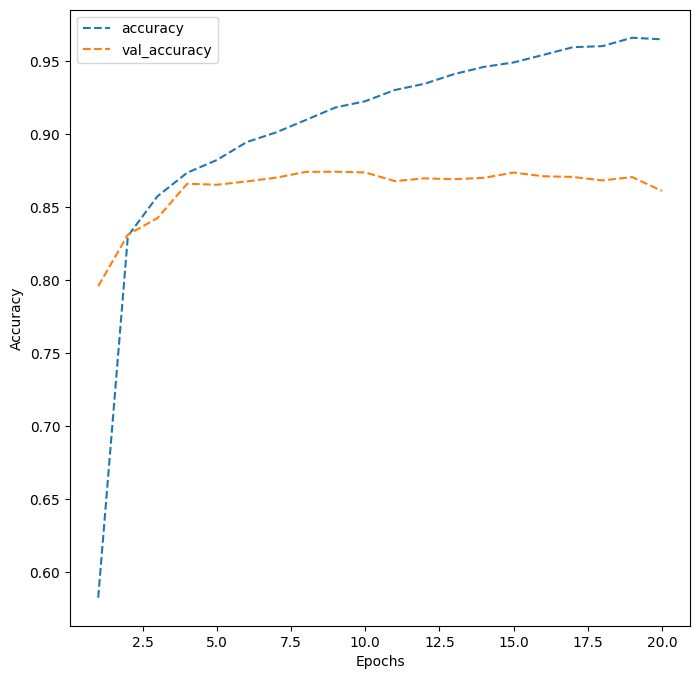

In [ ]:
# Plotting the accuracies

dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**

- The above plot shows that the model is overfitting the training data because it is performing poorly on the validation data

In [ ]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generator

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
# Define the model

def cnn_model_2():
    
    model = Sequential()
    
    # Add layers 

    model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1)))

    model.add(LeakyReLU(0.1))

    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

    model.add(LeakyReLU(0.1))

    model.add(MaxPool2D((2, 2), padding = 'same'))

    model.add(BatchNormalization())

    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

    model.add(LeakyReLU(0.1))

    model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))

    model.add(LeakyReLU(0.1))

    model.add(MaxPool2D((2, 2), padding = 'same'))

    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(32, activation='relu'))

    model.add(LeakyReLU(0.1))

    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    # Compile the model

    model.compile(optimizer=Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
# Build the model

model_2 = cnn_model_2()

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                      

In [ ]:
# Fit the model

history_model_2 = model_2.fit(
            X_train, y_train,
            epochs=30,
            validation_split=0.2,
            batch_size=128,
            verbose=1
)

Epoch 1/30
263/263 [==============================] - 7s 12ms/step - loss: 2.2048 - accuracy: 0.1532 - val_loss: 2.9738 - val_accuracy: 0.1135
Epoch 2/30
263/263 [==============================] - 3s 10ms/step - loss: 1.4211 - accuracy: 0.4986 - val_loss: 0.8622 - val_accuracy: 0.7448
Epoch 3/30
263/263 [==============================] - 3s 10ms/step - loss: 0.8245 - accuracy: 0.7205 - val_loss: 0.5368 - val_accuracy: 0.8389
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 0.6817 - accuracy: 0.7720 - val_loss: 0.4561 - val_accuracy: 0.8695
Epoch 5/30
263/263 [==============================] - 3s 10ms/step - loss: 0.5926 - accuracy: 0.8016 - val_loss: 0.4604 - val_accuracy: 0.8662
Epoch 6/30
263/263 [==============================] - 3s 10ms/step - loss: 0.5398 - accuracy: 0.8191 - val_loss: 0.4251 - val_accuracy: 0.8821
Epoch 7/30
263/263 [==============================] - 3s 10ms/step - loss: 0.5032 - accuracy: 0.8295 - val_loss: 0.4664 - val_accuracy: 0.8705

### **Plotting the validation and training accuracies**

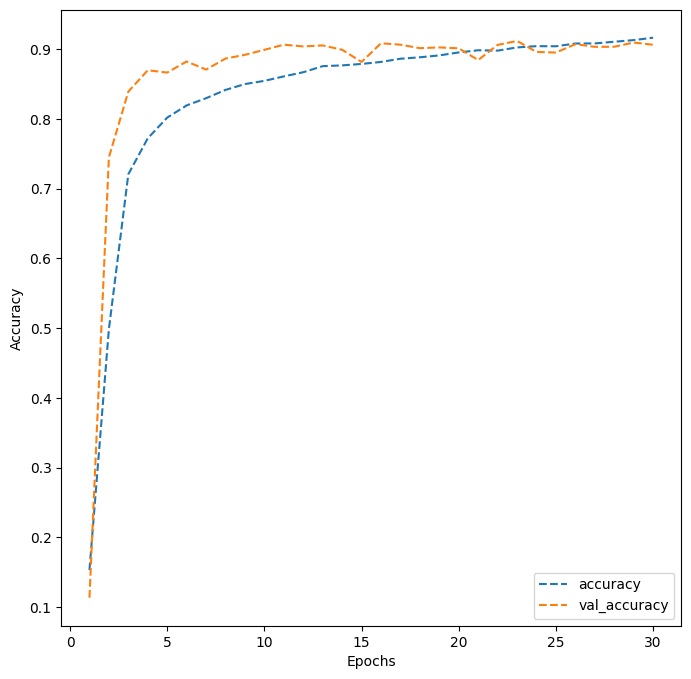

In [ ]:
# Plotting the accuracies

dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**
- The accuracy has improved to ~90% for both the traning and validation data.
- The model is generalizing well and is no longer overfitting the training data

## **Predictions on the test data**


In [ ]:
# Make prediction on the test data using model_2 

test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 1s 2ms/step


In [ ]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1814
           1       0.87      0.93      0.90      1828
           2       0.93      0.90      0.92      1803
           3       0.92      0.86      0.89      1719
           4       0.93      0.91      0.92      1812
           5       0.91      0.91      0.91      1768
           6       0.89      0.90      0.90      1832
           7       0.90      0.93      0.92      1808
           8       0.92      0.86      0.89      1812
           9       0.88      0.89      0.89      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000



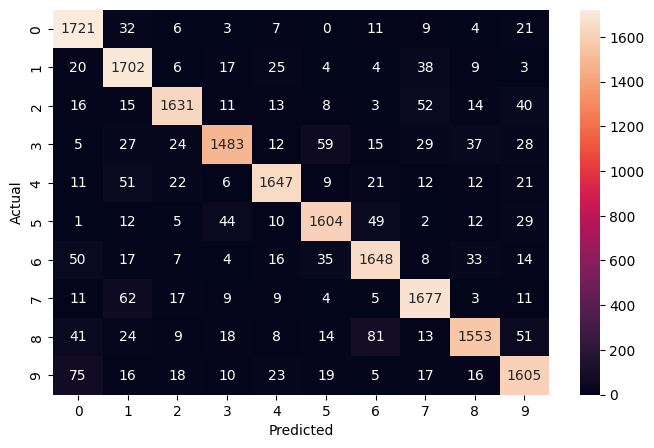

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:**
- This CNN model is performing well on the data with an accuracy of 90%
- The range of recall and precision values has decreased significantly compared to the artificial neural network constructed in the previous notebook
- This is to be expected since CNNs tend to perform better with images
- This model still predicts some 5's as 3's but at a much lower rate
- This model struggles the most with predicting 9s as 0s and 7s as 1s but not at a significant rate
